In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

# Plotly
import chart_studio.plotly as py
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots


In [18]:
data=pd.read_csv("GlobalLandTemperaturesByCountry.csv")
data.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [19]:
data.dropna(axis = 0, inplace = True)

In [20]:
data['Date'] = pd.to_datetime(data.dt)
data.drop(columns = ['dt'], axis = 1, inplace = True)
data['year'] = data['Date'].dt.year

In [21]:
data.head()

AverageTemperature  AverageTemperatureUncertainty Country       Date  year
0               4.384                          2.294   Åland 1743-11-01  1743
5               1.530                          4.680   Åland 1744-04-01  1744
6               6.702                          1.789   Åland 1744-05-01  1744
7              11.609                          1.577   Åland 1744-06-01  1744
8              15.342                          1.410   Åland 1744-07-01  1744

In [22]:
data.drop(columns=['Date'], axis = 1, inplace = True)

In [23]:
data.head()

AverageTemperature  AverageTemperatureUncertainty Country  year
0               4.384                          2.294   Åland  1743
5               1.530                          4.680   Åland  1744
6               6.702                          1.789   Åland  1744
7              11.609                          1.577   Åland  1744
8              15.342                          1.410   Åland  1744

In [24]:
landdata=data.groupby(['Country','year'])[['AverageTemperature', 'AverageTemperatureUncertainty']].mean().reset_index()

In [25]:
landdata.sort_values(by=['year','Country'], inplace=True, ascending=True)
landdata_ch=landdata[landdata['year']>=1900]
landdata.head()

Country  year  AverageTemperature  AverageTemperatureUncertainty
334   Albania  1743               8.620                          2.268
967   Andorra  1743               7.556                          2.188
2637  Austria  1743               2.482                          2.116
4041  Belarus  1743               0.767                          2.465
4308  Belgium  1743               7.106                          1.855

In [26]:
print(data['Country'].unique())

['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antigua And Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bonaire, Saint Eustatius And Saba'
 'Bosnia And Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' "Côte D'Ivoire" 'Cambodia'
 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo (Democratic Republic Of The)' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic'
 'Denmark (Europe)' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Europe' 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States Of Micronesia' '

In [27]:
print(landdata[landdata['Country']=='United Kingdom'])

              Country  year  AverageTemperature  AverageTemperatureUncertainty
43366  United Kingdom  1743            7.086000                       1.831000
43367  United Kingdom  1744            9.088250                       1.787750
43368  United Kingdom  1745            4.050500                       1.565250
43369  United Kingdom  1750            9.144182                       1.657182
43370  United Kingdom  1751            8.831875                       1.592250
...               ...   ...                 ...                            ...
43628  United Kingdom  2009            9.453333                       0.208833
43629  United Kingdom  2010            8.394333                       0.206583
43630  United Kingdom  2011            9.907917                       0.224917
43631  United Kingdom  2012            9.037417                       0.264500
43632  United Kingdom  2013            8.997500                       0.330250

[267 rows x 4 columns]


In [28]:
xdata=landdata[landdata['Country']=='United Kingdom']['year']
print(len(xdata))

267


In [29]:
ydata=landdata[landdata['Country']=='United Kingdom']['AverageTemperature']
print(len(ydata))

267


In [30]:
fig=go.Figure(go.Scatter(
x=xdata,
y=ydata,
mode='lines'))
fig.show()

In [32]:
landdata.columns

Index(['Country', 'year', 'AverageTemperature',
       'AverageTemperatureUncertainty'],
      dtype='object')

In [33]:
decades = np.unique(landdata['year'].apply(lambda x: str(x)[:3]))
mean_temp_UK = []
mean_temp_UK_uncertainty = []
decade = []
for dec in decades:
    mean_temp_UK.append(landdata[landdata['year'].apply(
        lambda x: str(x)[:3]) == dec]['AverageTemperature'].mean())
    mean_temp_UK_uncertainty.append(landdata[landdata['year'].apply(
                lambda x: str(x)[:3]) == dec]['AverageTemperatureUncertainty'].mean())
    decade.append(int(dec)*10)
fig=go.Figure(go.Scatter(
    x = decade, 
    y = mean_temp_UK))  
fig.update_xaxes(title_text='year')
fig.update_yaxes(title_text='Average UK land Temperature')
fig.show()

In [34]:
print(decade)

[1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]


In [35]:
import plotly.express as px
fig=px.choropleth(landdata_ch,locations='Country',color='AverageTemperature',
locationmode='country names', animation_frame='year',
color_continuous_scale="Inferno",animation_group='Country',projection='natural earth',
hover_name='Country')
fig.show()

In [36]:
global_temp = pd.read_csv("GlobalTemperatures.csv")
global_temp.dropna(axis = 0, inplace = True)
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
global_temp.head()
                          

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200  1850-01-01                   0.749                              1.105   
1201  1850-02-01                   3.071                              1.275   
1202  1850-03-01                   4.954                              0.955   
1203  1850-04-01                   7.217                              0.665   
1204  1850-05-01                  10.004                              0.617   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1200               8.242                          1.738              -3.206   
1201               9.970                          3.007              -2.291   
1202              10.347                          2.401              -1.905   
1203              12.934                          1.004               1.018   
1204              15.655                          2.406               3.811   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1200                          2.822                          12.833   
1201                          1.623                          13.588   
1202                          1.410                          14.043   
1203                          1.329                          14.667   
1204                          1.347                          15.507   

      LandAndOceanAverageTemperatureUncertainty  
1200                                      0.367  
1201                                      0.414  
1202                                      0.341  
1203                                      0.267  
1204                                      0.249

In [37]:
mean_temp_world = []
mean_temp_world_uncertainty = []
for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
fig.show()

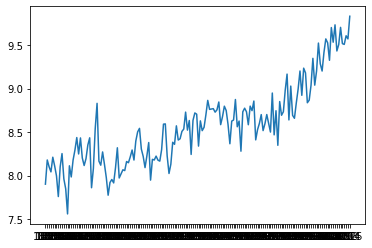

In [38]:
plt.plot(years,mean_temp_world)
plt.show()

https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions

In [39]:
data=pd.read_csv("owid-co2-data.csv")
data.head()

iso_code      country  year    co2  co2_growth_prct  co2_growth_abs  \
0      AFG  Afghanistan  1949  0.015              NaN             NaN   
1      AFG  Afghanistan  1950  0.084          475.000           0.070   
2      AFG  Afghanistan  1951  0.092            8.696           0.007   
3      AFG  Afghanistan  1952  0.092              NaN             NaN   
4      AFG  Afghanistan  1953  0.106           16.000           0.015   

   consumption_co2  trade_co2  trade_co2_share  co2_per_capita  ...  \
0              NaN        NaN              NaN           0.002  ...   
1              NaN        NaN              NaN           0.011  ...   
2              NaN        NaN              NaN           0.012  ...   
3              NaN        NaN              NaN           0.012  ...   
4              NaN        NaN              NaN           0.013  ...   

   ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
0             NaN      NaN                 NaN            NaN   
1             NaN      NaN                 NaN            NaN   
2             NaN      NaN                 NaN            NaN   
3             NaN      NaN                 NaN            NaN   
4             NaN      NaN                 NaN            NaN   

   nitrous_oxide_per_capita  primary_energy_consumption  energy_per_capita  \
0                       NaN                         NaN                NaN   
1                       NaN                         NaN                NaN   
2                       NaN                         NaN                NaN   
3                       NaN                         NaN                NaN   
4                       NaN                         NaN                NaN   

   energy_per_gdp  population           gdp  
0             NaN   7663783.0           NaN  
1             NaN   7752000.0  1.949480e+10  
2             NaN   7840000.0  2.006385e+10  
3             NaN   7936000.0  2.074235e+10  
4             NaN   8040000.0  2.201546e+10  

[5 rows x 55 columns]

In [40]:
print(data.columns)

Index(['iso_code', 'country', 'year', 'co2', 'co2_growth_prct',
       'co2_growth_abs', 'consumption_co2', 'trade_co2', 'trade_co2_share',
       'co2_per_capita', 'consumption_co2_per_capita', 'share_global_co2',
       'cumulative_co2', 'share_global_cumulative_co2', 'co2_per_gdp',
       'consumption_co2_per_gdp', 'co2_per_unit_energy', 'cement_co2',
       'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2',
       'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'other_co2_per_capita', 'share_global_coal_co2', 'share_global_oil_co2',
       'share_global_gas_co2', 'share_global_flaring_co2',
       'share_global_cement_co2', 'cumulative_coal_co2', 'cumulative_oil_co2',
       'cumulative_gas_co2', 'cumulative_flaring_co2', 'cumulative_cement_co2',
       'share_global_cumulative_coal_co2', 'share_global_cumulative_oil_co2',
       'share_global_cumulative_gas_co2',
       'share_g

Annual emissions figures are often used to compare countries’ contribution to climate change. But this metric often reflects differences in population size across the world.

To understand the ‘footprint’ of the average person in a given country, this chart shows per capita emissions.

These figures reflect ‘production-based’ emissions, so do not correct for traded goods.


In [41]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x = data[data.country=='United States'].year, 
    y = data[data.country=='United States'].co2_per_capita,
    name = "US"
))  
fig.update_xaxes(title_text='year')
fig.update_yaxes(title_text='Per capita CO2 emissions (tonnes)')
fig.show()

In [42]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x = data[data.country=='United States'].year, 
    y = data[data.country=='United States'].co2/10**3,
    name = "US"
))  
fig.add_trace(go.Scatter(
    x = data[data.country=='United Kingdom'].year, 
    y = data[data.country=='United Kingdom'].co2/10**3,
    name = "UK"
))  
fig.add_trace(go.Scatter(
    x = data[data.country=='China'].year, 
    y = data[data.country=='China'].co2/10**3,
    name = "China"
))  
fig.update_xaxes(title_text='year')
fig.update_yaxes(title_text='Annual CO2 emissions (billions of tonnes)')
fig.show()

When we only look at emissions produced today, we fail to recognise historical responsibility for emissions in recent decades or centuries.

This interactive chart shows cumulative CO2 emissions – the sum of emissions produced since 1751 to the given year. This allows us to understand how much of the total CO2 emissions to date has been emitted by a given country. This measures CO₂ emissions from fossil fuels and cement production only – land use change is not included.


In [43]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x = data[data.country=='United States'].year, 
    y = data[data.country=='United States'].cumulative_co2/10**3,
    name = "US"
))  
fig.add_trace(go.Scatter(
    x = data[data.country=='China'].year, 
    y = data[data.country=='China'].cumulative_co2/10**3,
    name = "China"
))  
fig.update_xaxes(title_text='year')
fig.update_yaxes(title_text='Cumulative CO2 emissions (in billions of tonnes)')
fig.update_layout(title='Cumulative CO2 emissions')
fig.show()

In [91]:
Country_names=data.country.unique().tolist()
Country_names_short=['United Kingdom','United States']
data2=data[data.country.isin(Country_names_short)]
data2.head()

iso_code         country  year    co2  co2_growth_prct  co2_growth_abs  \
22099      GBR  United Kingdom  1750  9.351              NaN             NaN   
22100      GBR  United Kingdom  1751  9.351              NaN             NaN   
22101      GBR  United Kingdom  1752  9.354            0.039           0.004   
22102      GBR  United Kingdom  1753  9.354              NaN             NaN   
22103      GBR  United Kingdom  1754  9.358            0.039           0.004   

       consumption_co2  trade_co2  trade_co2_share  co2_per_capita  ...  \
22099              NaN        NaN              NaN             NaN  ...   
22100              NaN        NaN              NaN             NaN  ...   
22101              NaN        NaN              NaN             NaN  ...   
22102              NaN        NaN              NaN             NaN  ...   
22103              NaN        NaN              NaN             NaN  ...   

       ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
22099             NaN      NaN                 NaN            NaN   
22100             NaN      NaN                 NaN            NaN   
22101             NaN      NaN                 NaN            NaN   
22102             NaN      NaN                 NaN            NaN   
22103             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  primary_energy_consumption  \
22099                       NaN                         NaN   
22100                       NaN                         NaN   
22101                       NaN                         NaN   
22102                       NaN                         NaN   
22103                       NaN                         NaN   

       energy_per_capita  energy_per_gdp  population  gdp  
22099                NaN             NaN         NaN  NaN  
22100                NaN             NaN         NaN  NaN  
22101                NaN             NaN         NaN  NaN  
22102                NaN             NaN         NaN  NaN  
22103                NaN             NaN         NaN  NaN  

[5 rows x 55 columns]

In [92]:
print(len(data2))

490


In [93]:
country='United States'
print(pd.Series(data2.country.unique()).isin([country]))


0    False
1     True
dtype: bool


In [94]:
list(pd.Series(data2.country.unique()).map(lambda country: print(country)))

United Kingdom
United States


[None, None]

In [101]:
def multi_plot(data, addAll = True):
    fig = go.Figure()

    for country in Country_names_short:
        fig.add_trace(
            go.Scatter(
                x = data[data.country==country].year,
                y = data[data.country==country].co2/1000.,
                name = country
            )
        )
        fig.update_xaxes(title_text='year')
        fig.update_yaxes(title_text='(in billions of tonnes)')
    
    button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': pd.Series(data.country.unique()).isin(Country_names_short),
                               'title': 'All',
                               'showlegend':True}])
    
    def create_layout_button(country):
        print(country), print(pd.Series(data.country.unique()).isin([country]))
        return dict(label = country,
                    method = 'update',
                    args = [{'visible': pd.Series(data.country.unique()).isin([country]),
                             'title': country,
                             'showlegend': True}])
    
    fig.update_layout(title='CO2 emissions',
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(pd.Series(data.country.unique()).map(lambda country: create_layout_button(country)))
            )
        ])
    
    fig.show()

In [102]:
multi_plot(data2)

United Kingdom
0     True
1    False
dtype: bool
United States
0    False
1     True
dtype: bool
